# Lansing Weather Analysis

## Data Source

<ul>
    <li> https://www.visualcrossing.com/weather/weather-data-services#  need money
    <li> https://w1.weather.gov/data/obhistory/KTEW.html Government Data,Free, but not intuitive.


## Data Preprocessing

In [1]:
import pandas
import seaborn as sns

In [2]:
main_df = pandas.read_csv("./data/lansing 2012-01-01 to 2022-12-31.csv")

In [3]:
main_df.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,lansing,2012-01-01,6.8,-1.1,2.4,2.2,-8.2,-3.1,0.0,84.3,...,4.4,2,NaN,2012-01-01T08:08:45,2012-01-01T17:14:40,0.26,Overcast,Cloudy skies throughout the day.,cloudy,"72539014836,72028404877,KY70,KFPK,KLAN,7253780..."
1,lansing,2012-01-02,-1.8,-7.1,-4.0,-8.3,-14.8,-11.1,-8.4,72.1,...,2.3,1,NaN,2012-01-02T08:08:49,2012-01-02T17:15:33,0.31,"Snow, Overcast",Cloudy skies throughout the day with morning s...,snow,"72539014836,72028404877,KY70,KFPK,KLAN,7253780..."
2,lansing,2012-01-03,-5.0,-9.2,-7.0,-9.5,-16.7,-13.4,-12.6,64.6,...,6.2,3,NaN,2012-01-03T08:08:52,2012-01-03T17:16:27,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72539014836,72028404877,KY70,KFPK,KLAN,7253780..."
3,lansing,2012-01-04,2.0,-6.9,-2.6,-2.7,-13.9,-8.1,-7.7,68.3,...,7.2,4,NaN,2012-01-04T08:08:51,2012-01-04T17:17:23,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72539014836,KY70,72028404877,KFPK,KLAN,7253780..."
4,lansing,2012-01-05,5.8,-4.2,0.5,3.0,-7.4,-2.4,-3.3,77.1,...,6.3,3,NaN,2012-01-05T08:08:49,2012-01-05T17:18:20,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72539014836,72028404877,KY70,KFPK,KLAN,7253780..."


In [4]:
main_df = main_df.iloc[:,[1,2,3,4,5,6,7,10,11,12,13,14,15,29]]

In [5]:
main_df.head(5)

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,precip,precipprob,precipcover,preciptype,snow,snowdepth,conditions
0,2012-01-01,6.8,-1.1,2.4,2.2,-8.2,-3.1,0.000,0,0.00,NaN,NaN,NaN,Overcast
1,2012-01-02,-1.8,-7.1,-4.0,-8.3,-14.8,-11.1,0.568,100,8.33,snow,NaN,NaN,"Snow, Overcast"
2,2012-01-03,-5.0,-9.2,-7.0,-9.5,-16.7,-13.4,0.000,0,0.00,NaN,NaN,NaN,Partially cloudy
3,2012-01-04,2.0,-6.9,-2.6,-2.7,-13.9,-8.1,0.000,0,0.00,NaN,NaN,NaN,Partially cloudy
4,2012-01-05,5.8,-4.2,0.5,3.0,-7.4,-2.4,0.000,0,0.00,NaN,NaN,NaN,Partially cloudy


## Naive Data Visualization
By comparing tempmax and feelslikemax in dataset, we are able to notice that two values aligns relatively closer comparing to ones 
they are in extreme temperature, >27C or <10C.

<AxesSubplot:xlabel='feelslikemax', ylabel='tempmax'>

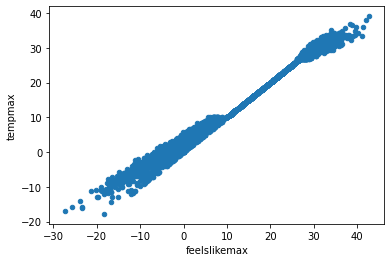

In [6]:
main_df.plot.scatter("feelslikemax", "tempmax")

## Heatmap of variables

To observe the correlation between variables, a correlation matrix is necessary by using pandas in-built function.Since the magnitude of any two combination of variables are removed, it is more intuitive to compare using correlation matrix instead of covariance matrix.

## Insights from Heatmap
According to the Heatmap, we observsed that the heatmap can be dived into three components.The first component is about variable that is related to temperature from the dataset. It is easy to notice that the correlation between any two variables in this component is around 1, which leads to the conclusion that they are mutually highly correlated.We believe that although the apparent temperature (feelslikemax, feelslikemin) is not as accurate as the objective temperature, it still can reflect that the real temperature to a certain extend. For second components, they are all about precipitation.From the heatmap, we observed that the precipitation probability and the fraction of coverage of precipitation is 0.65, which is positive strong correlation. And we also observed that the amount of precipitation also have the similar relation with the precipitation probability.For last component, we observed that all the variables that are related to snow have negative strong correlation with the tempurature related variables. This is obviousl to explain that the higher tempurature leads to lower probobility of snow and snowdepth.


<AxesSubplot:>

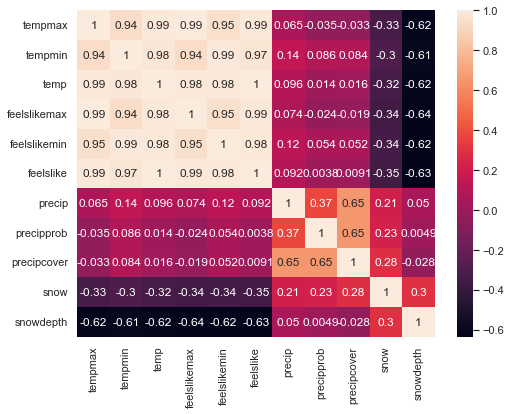

In [7]:
corrX_main_df = main_df.corr()
sns.set(rc={"figure.figsize":(8, 6)})
sns.heatmap(corrX_main_df, annot = True)

## Monthly/Seasonal Weather Analysis

First we split the datetime attribute into 3 columns, they are year(int), month(int), and day(int). By splitting into 3 columns, we are able to categorize data into specific time frame. Also, with groupby operator, we are able to retrieve statistical values such as sum and average according to year or month across the 10 year time period dataset.

In [8]:
# Split datetime into year, month, and day. Note that datetime column is in ISO-8601 format.
main_df[["year", "month", "day"]] = main_df["datetime"].str.split("-", expand=True)
main_df["year"] = main_df["year"].astype("int")
main_df["month"] = main_df["month"].astype("int")
main_df["day"] = main_df["day"].astype("int")

In [32]:
analysis_df = pandas.DataFrame()
analysis_df["avgTemp"] = main_df.groupby(by=["month"])[["temp"]].mean()
analysis_df["avgPrecip"] = main_df.groupby(by=["month"])[["precip"]].sum()/10

In [33]:
analysis_df

,avgTemp,avgPrecip
month,,
1,-4.019648,61.1803
2,-3.641801,61.8063
3,2.323754,63.0576
4,7.936667,85.3885
5,15.687683,98.4143
6,20.730303,125.9461
7,22.803226,68.1270
8,21.544868,120.4763
9,17.691818,76.3918


## Categorized Data for Infographic

<ul>
    <li> Max Temp
    <li> Min Temp
    <li> Max Precip
    <li> Month Average Temp.
    <li> Month Average Precipiation
        

In [24]:
# Find max temperature
main_df["tempmax"].max()

39.1

In [26]:
# Find min temperature
main_df["tempmin"].min()

-25.6

In [29]:
# Find Max preciptation a day
main_df["precip"].max()

90.529

In [42]:
# Find count of days that rain
len(main_df[main_df["precip"] > 0])/10

194.6

In [35]:
analysis_df.to_excel(".\data\monthly_data.xlsx")

# Next Time:
<ul>
    <li> Thermometer for maxtemp/mintemp. maxtemp: red color, higher reader/ mintemp: blue color, lower reader.
    <li> Alternative - Text in Icon: Sun image for maxtemp, snowflask for mintemp.
    <li> Drip to represent max value of precipitation.
    <li> (Optional)Indicate annual average days that rain. 
</ul>

# Ideas:
<ul>
    <li> Infographics(信息图): https://www.vecteezy.com/vector-art/459313-weather-infographics-set
    <li> Infographic（温度计）: <img src=".\img\温度计范例.jpg" style="height: 200px; width:100px">
    <li> Heatmap: https://zhuanlan.zhihu.com/p/96040773
    <li> Pandas GroupBy 用法: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
</ul>